In [34]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from scipy import stats

from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
%load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
asso2 = pd.read_pickle('/data/ana_asso_2Hz_reci')
asso50 = pd.read_pickle('/data/ana_asso_50Hz_reci')
asso50_uni = pd.read_pickle('/data/ana_asso_50Hz_uni')

In [3]:
asso2

,Before,After,File name,elimi
139,"{'PPR': [[0.944552216901], [1.3201915178], [1....","{'PPR': [[1.26057778479], [1.93387815741], [1....",2017111401,50
140,"{'PPR': [[1.12606452215], [1.14102013987], [1....","{'PPR': [[1.63746504222], [1.12122520983], [1....",2017111402,35
141,"{'PPR': [[1.33878906564], [1.74351453188], [2....","{'PPR': [[0.366804484194], [0.306563904326], [...",2017111501,16
142,"{'PPR': [[0.885375305987], [0.777072705992], [...","{'PPR': [[1.15153043915], [1.54169178475], [0....",2017111601,50
143,"{'PPR': [[2.85269657363], [0.717403633019], [0...","{'PPR': [[1.05000496766], [0.87192570254], [1....",2017111601,30
144,"{'PPR': [[0.760356524872], [nan], [nan], [1.62...","{'PPR': [[1.24242197754], [1.1462926532], [1.4...",2017111602,17
145,"{'PPR': [[0.98125018317], [1.18563830867], [1....","{'PPR': [[1.97548316654], [1.53052777417], [1....",2017111001,25
146,"{'PPR': [[1.59826156554], [1.92292841341], [1....","{'PPR': [[1.49161978963], [1.02473529395], [0....",2017111002,25


In [4]:
asso50

,Before,After,File name,elimi
53,"{'PPR': [[1.44122662998], [1.04424018603], [1....","{'PPR': [[0.560687096856], [0.729656109157], [...",2016120503,15
56,"{'PPR': [[0.652953942162], [0.574974729772], [...","{'PPR': [[0.786648879267], [0.696722877253], [...",2016092901,60
58,"{'PPR': [[1.22127727791], [1.06263895926], [1....","{'PPR': [[0.780765382683], [0.494727895693], [...",2016120202,17
60,"{'PPR': [[0.415529621686], [1.76192305105], [1...","{'PPR': [[0.671172264431], [1.11874331066], [0...",2016120504,17
62,"{'PPR': [[0.933751984367], [1.45015533285], [1...","{'PPR': [[0.674316122333], [0.519242531873], [...",2017051001,50
63,"{'PPR': [[2.78026445363], [1.87745947261], [0....","{'PPR': [[0.613686956686], [1.12116687657], [1...",2017051002,50


In [5]:
asso50_uni

,Before,After,File name,elimi
52,"{'ave_all': [[3.9822923503e-12, 1.24244289234e...","{'ave_all': [[1.00522615757e-12, 5.27346616075...",2016103101,25
53,"{'ave_all': [[2.12998787777e-12, 2.20110876472...","{'ave_all': [[1.57551494512e-12, 1.66233577343...",2016120503,30
54,"{'ave_all': [[4.52069524589e-13, 7.57542532589...","{'ave_all': [[2.16181659035e-12, 2.11594841998...",2017050901,30
55,"{'ave_all': [[1.73961295263e-12, 1.44018094567...","{'ave_all': [[1.01045649784e-12, 1.04774125645...",2017052203,28
56,"{'ave_all': [[4.94096504618e-12, 6.66442808513...","{'ave_all': [[6.70510596773e-12, 8.31254514949...",2016092901,30


/src/Patch_ana/Patch_ana/patch_pip.py:517: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


(0.2, 1.8)

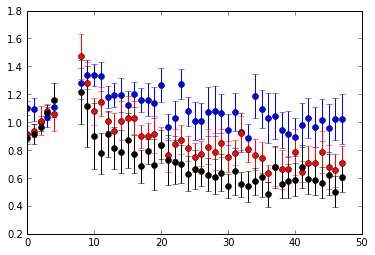

In [6]:
ave_ptl_resp = np.ones((len(asso2), 60))*np.nan

ave_ptl_mean_2,ave_ptl_ste_2,ave_ptl_2  = patch_pip.samp_ave(asso2, ave_ptl_resp)
ave_ptl_mean_2 = ave_ptl_mean_2[:-12]
ave_ptl_ste_2 = ave_ptl_ste_2[:-12]
ave_ptl_2 = ave_ptl_2[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

ave_ptl_resp = np.ones((len(asso50), 60))*np.nan
ave_ptl_mean_50,ave_ptl_ste_50, ave_ptl_50 = patch_pip.samp_ave(asso50, ave_ptl_resp)
ave_ptl_mean_50 = ave_ptl_mean_50[:-12]
ave_ptl_ste_50 = ave_ptl_ste_50[:-12]
ave_ptl_50 = ave_ptl_50[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ro')

ave_ptl_resp = np.ones((len(asso50_uni), 60))*np.nan
ave_ptl_mean_50_uni,ave_ptl_ste_50_uni, ave_ptl_50_uni = patch_pip.samp_ave(asso50_uni, ave_ptl_resp)
ave_ptl_mean_50_uni = ave_ptl_mean_50_uni[:-12]
ave_ptl_ste_50_uni = ave_ptl_ste_50_uni[:-12]
ave_ptl_50_uni = ave_ptl_50_uni[:, :-12]
plt.errorbar(x=np.arange(len(ave_ptl_mean_50_uni)), y=ave_ptl_mean_50_uni, yerr=ave_ptl_ste_50_uni, fmt='ko')

plt.ylim([0.2, 1.8])

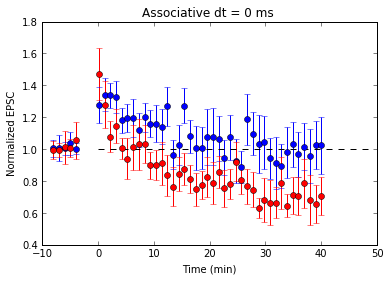

In [29]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_2cp) - 6 * 4/3, len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(asso2)))

ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_50cp)- 6 * 4/3, len(ave_ptl_mean_50cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='50Hz (n={a})'.format(a=len(asso50)))


plt.plot(np.ones((50))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
# plt.legend()
plt.title('Associative dt = 0 ms ')

with PdfPages('/data/Figure4_1.pdf') as pdf:
    pdf.savefig()

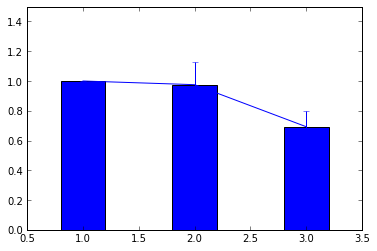

In [8]:
# Compare amplitude
mean_amp_aft_2Hz = np.nanmean(np.nanmean(ave_ptl_2[:, -10:], axis=1))
mean_amp_aft_50Hz = np.nanmean(np.nanmean(ave_ptl_50[:, -10:], axis=1))

std_amp_aft_2Hz = np.nanstd(np.nanmean(ave_ptl_2[:, -10:], axis=1))/np.sqrt(6)
std_amp_aft_50Hz = np.nanstd(np.nanmean(ave_ptl_50[:, -10:], axis=1))/np.sqrt(6)
plt.bar([1,2,3], [1, mean_amp_aft_2Hz, mean_amp_aft_50Hz], align='center', width=0.4)
plt.errorbar(x=[1,2,3], y=[1, mean_amp_aft_2Hz, mean_amp_aft_50Hz],yerr = [0, std_amp_aft_2Hz, std_amp_aft_50Hz], fmt='')
plt.ylim([0,1.5])

with PdfPages('/data/Figure4_4.pdf') as pdf:
    pdf.savefig()

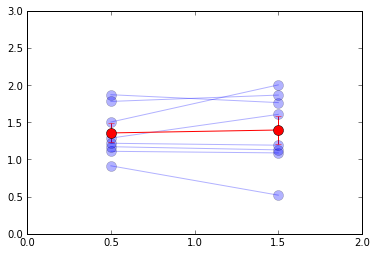

In [9]:
# Compare PPR
mean_PPR_bef = [np.nanmean(asso2['Before'].loc[i]['PPR']) for i in asso2['Before'].index]
mean_PPR_aft = [np.nanmean(asso2['After'].loc[i]['PPR'][-10:]) for i in asso2['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
with PdfPages('/data/Supp4_1.pdf') as pdf:
    pdf.savefig()

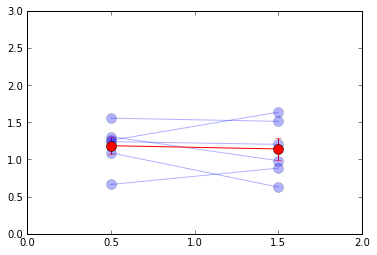

In [10]:
# Compare PPR
mean_PPR_bef = [np.nanmean(asso50['Before'].loc[i]['PPR']) for i in asso50['Before'].index]
mean_PPR_aft = [np.nanmean(asso50['After'].loc[i]['PPR'][-10:]) for i in asso50['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
with PdfPages('/data/Supp4_2.pdf') as pdf:
    pdf.savefig()

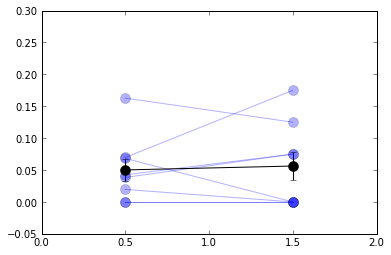

In [31]:
# Compare failure rate
mean_fail_bef = [np.sum(asso2['Before'].loc[i]['failure'])/len(asso2['Before'].loc[i]['failure']) for i in asso2['Before'].index]
mean_fail_aft = [np.sum(asso2['After'].loc[i]['failure'][-40:])/40 for i in asso2['After'].index]

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(len(mean_fail_bef))
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(len(mean_fail_aft))

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.3])

with PdfPages('/data/Figure4_5.pdf') as pdf:
    pdf.savefig()

Ttest_relResult(statistic=-1.0823768991862392, pvalue=0.32850004780420877)


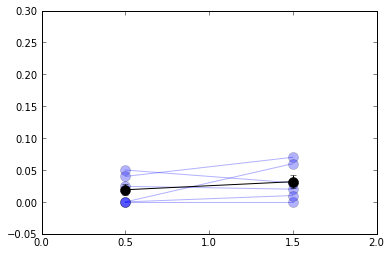

In [36]:
# Compare failure rate
mean_fail_bef = [np.sum(asso50['Before'].loc[i]['failure'])/len(asso50['Before'].loc[i]['failure']) for i in asso50['Before'].index]
mean_fail_aft = [np.sum(asso50['After'].loc[i]['failure'][-40:])/40 for i in asso50['After'].index]
print(stats.ttest_rel(mean_fail_bef, mean_fail_aft))

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(len(mean_fail_bef))
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(len(mean_fail_aft))

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.3])

with PdfPages('/data/Figure4_6.pdf') as pdf:
    pdf.savefig()

/src/Patch_ana/Patch_ana/patch_pip.py:517: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


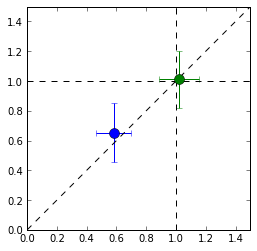

In [28]:
# CV analysis
r_50, pi_50 = patch_pip.cv_analysis(asso50, bef_len=10, aft_len=100)
r_50.pop(2)
pi_50.pop(2)

plt.errorbar(np.mean(pi_50), np.mean(r_50), np.std(r_50)/np.sqrt(len(r_50)), np.std(pi_50)/np.sqrt(len(pi_50)),  'o', markersize=10)

# CV analysis
r_2, pi_2 = patch_pip.cv_analysis(asso2, bef_len=20, aft_len=100)
plt.errorbar(np.mean(pi_2), np.mean(r_2), np.std(r_2)/np.sqrt(len(r_2)), np.std(pi_2)/np.sqrt(len(pi_2)),  'o', markersize=10)

plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])
plt.axes().set_aspect('equal')
with PdfPages('/data/Figure4_7.pdf') as pdf:
    pdf.savefig()

[0, 60, 0.1, 1.7]

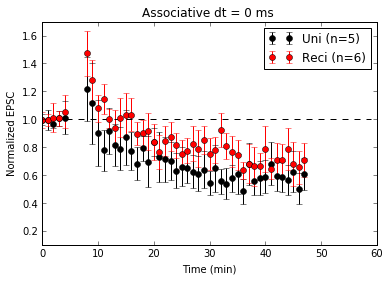

In [14]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_50_uni, ave_ptl_ste_50_uni
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='ko', label='Uni (n={a})'.format(a=len(asso50_uni)))
ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='Reci (n={a})'.format(a=len(asso50)))
plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Associative dt = 0 ms ')
plt.axis([0,60,0.1,1.7])